In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

El set de datos trabajado fue adquirido de la web de Kaggle (https://www.kaggle.com/datasets). A nivel captura de datos la metodología fue la lectura desde un csv.

In [2]:
datos_leidos = pd.read_csv("Spotify_Youtube.csv",index_col=0)

In [3]:
df=datos_leidos
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_resume = df[numeric_columns].describe()
numeric_resume

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [4]:
correlations=df[numeric_columns].corr()

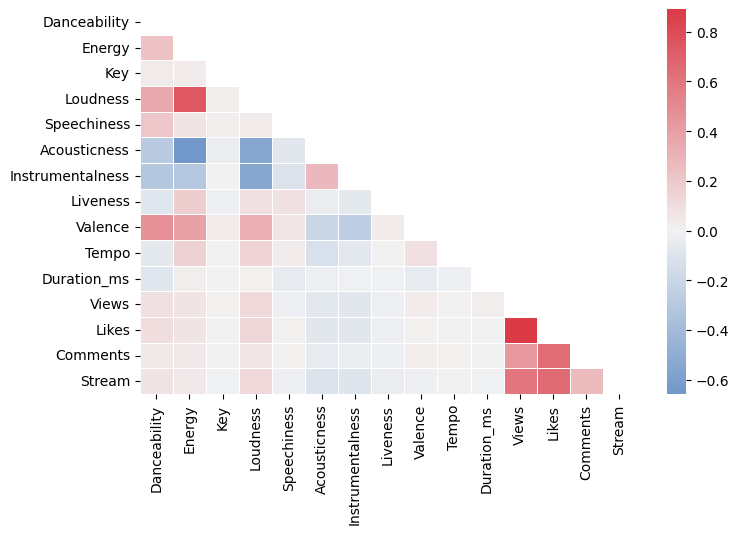

In [5]:
f, ax = plt.subplots(figsize=(8, 5))
cmap = sn.diverging_palette(250, 10, as_cmap=True)
mask = np.triu(np.ones_like(correlations, dtype=bool))
sn.heatmap(correlations, cmap=cmap, mask=mask , linewidths=0.5, center=0)
plt.show()


In [6]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [7]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials 
client_id = "67e290d37cfb429b8c53c0c930133bff"
client_secret = "6880ee9c0dca48d7a9e520da6be9d2f2"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 

In [8]:
name = ["Micheal Jackson","pitbull","Christina","Elvis Presley"]
result = sp.search(name) 
result['tracks']['items'][1]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/3fMbdgg4jU18AjLCKBhRSm'},
  'href': 'https://api.spotify.com/v1/artists/3fMbdgg4jU18AjLCKBhRSm',
  'id': '3fMbdgg4jU18AjLCKBhRSm',
  'name': 'Michael Jackson',
  'type': 'artist',
  'uri': 'spotify:artist:3fMbdgg4jU18AjLCKBhRSm'}]

In [9]:
sample = sp.audio_features('0d28khcov6AiegSCpG5TuT')
sample

[{'danceability': 0.818,
  'energy': 0.705,
  'key': 6,
  'loudness': -6.679,
  'mode': 1,
  'speechiness': 0.177,
  'acousticness': 0.00836,
  'instrumentalness': 0.00233,
  'liveness': 0.613,
  'valence': 0.772,
  'tempo': 138.559,
  'type': 'audio_features',
  'id': '0d28khcov6AiegSCpG5TuT',
  'uri': 'spotify:track:0d28khcov6AiegSCpG5TuT',
  'track_href': 'https://api.spotify.com/v1/tracks/0d28khcov6AiegSCpG5TuT',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0d28khcov6AiegSCpG5TuT',
  'duration_ms': 222640,
  'time_signature': 4}]

In [10]:
track = sp.track('0d28khcov6AiegSCpG5TuT')
track['album']['release_date']


'2005-05-23'

con esto consigo el release date de un track (en realidad del album de ese track)

In [11]:
release_date = sp.track('0d28khcov6AiegSCpG5TuT')['album']['release_date']
release_date



'2005-05-23'

acá consigo todos los ids de los tracks

In [12]:
uri = (df.loc[:, 'Uri'])
list_id= uri.str[-22:]
print(list_id)
type(list_id)
print(len(list_id))


0        0d28khcov6AiegSCpG5TuT
1        1foMv2HQwfQ2vntFf9HFeG
2        64dLd6rVqDLtkXFYrEUHIU
3        0q6LuUqGLUiCPP1cbdwFs3
4        7yMiX7n9SBvadzox8T5jzT
                  ...          
20713    0RtcKQGyI4hr8FgFH1TuYG
20714    3rHvPA8lUnPBkaLyPOc0VV
20715    4jk00YxPtPbhvHJE9N4ddv
20716    5EyErbpsugWliX006eTDex
20717    6lOn0jz1QpjcWeXo1oMm0k
Name: Uri, Length: 20718, dtype: object
20718


In [13]:
print(list_id[1:4])

1    1foMv2HQwfQ2vntFf9HFeG
2    64dLd6rVqDLtkXFYrEUHIU
3    0q6LuUqGLUiCPP1cbdwFs3
Name: Uri, dtype: object


In [14]:
dates=[]
for i in list_id[1:4]:
    print(sp.track(i)['album']['release_date'])
    dates.append(sp.track(i)['album']['release_date'])
    print(dates)

2010-03-03
['2010-03-03']
2022-08-31
['2010-03-03', '2022-08-31']
2010-03-03
['2010-03-03', '2022-08-31', '2010-03-03']


In [18]:
df1000 = pd.DataFrame(list_id[1:4])
df2 = df1000.assign(Dates=dates)
print(df2)


                      Uri       Dates
1  1foMv2HQwfQ2vntFf9HFeG  2010-03-03
2  64dLd6rVqDLtkXFYrEUHIU  2022-08-31
3  0q6LuUqGLUiCPP1cbdwFs3  2010-03-03
